# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [38]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM


learning_rates = [10**(-f) for f in np.arange(2,3,0.2)]#[1e-8,5e-8, 1e-7,5e-7,1e-6]
regularization_strengths = [10**(f) for f in np.arange(-3,-1,0.2)]#[5e6,1e7,5e7]
#learning_rates = [10**(-f) for f in np.arange(2,4,0.2)]
#regularization_strengths = [10**(f) for f in np.arange(.5,1.5,.2)]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, learning_rate=lr, reg=rs,
                      num_iters=1000, verbose=True)
        train_accu=np.mean(svm.predict(X_train_feats)==y_train)
        val_accu=np.mean(svm.predict(X_val_feats)==y_val)
        results[(lr,rs)]=(train_accu, val_accu)
        if(val_accu>best_val):
            best_val=val_accu
            best_svm=svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1000: loss 9.004028
iteration 100 / 1000: loss 3.092606
iteration 200 / 1000: loss 3.468436
iteration 300 / 1000: loss 3.152112
iteration 400 / 1000: loss 2.912181
iteration 500 / 1000: loss 3.074548
iteration 600 / 1000: loss 2.748649
iteration 700 / 1000: loss 2.729892
iteration 800 / 1000: loss 3.041351
iteration 900 / 1000: loss 2.957994
iteration 0 / 1000: loss 9.012197
iteration 100 / 1000: loss 3.399428
iteration 200 / 1000: loss 3.635381
iteration 300 / 1000: loss 2.659053
iteration 400 / 1000: loss 3.044956
iteration 500 / 1000: loss 3.034288
iteration 600 / 1000: loss 3.289091
iteration 700 / 1000: loss 2.865712
iteration 800 / 1000: loss 2.778667
iteration 900 / 1000: loss 2.999812
iteration 0 / 1000: loss 9.014449
iteration 100 / 1000: loss 2.966852
iteration 200 / 1000: loss 3.797720
iteration 300 / 1000: loss 3.170860
iteration 400 / 1000: loss 2.795283
iteration 500 / 1000: loss 2.775645
iteration 600 / 1000: loss 3.058700
iteration 700 / 1000: loss 2.99189

iteration 900 / 1000: loss 3.215350
iteration 0 / 1000: loss 9.003822
iteration 100 / 1000: loss 3.817503
iteration 200 / 1000: loss 3.188666
iteration 300 / 1000: loss 3.038666
iteration 400 / 1000: loss 2.508305
iteration 500 / 1000: loss 3.249568
iteration 600 / 1000: loss 2.982543
iteration 700 / 1000: loss 2.855423
iteration 800 / 1000: loss 3.360392
iteration 900 / 1000: loss 2.678437
iteration 0 / 1000: loss 9.009596
iteration 100 / 1000: loss 3.615900
iteration 200 / 1000: loss 3.473869
iteration 300 / 1000: loss 3.252035
iteration 400 / 1000: loss 3.504189
iteration 500 / 1000: loss 3.065450
iteration 600 / 1000: loss 2.636619
iteration 700 / 1000: loss 3.300353
iteration 800 / 1000: loss 3.092397
iteration 900 / 1000: loss 3.032265
iteration 0 / 1000: loss 9.004180
iteration 100 / 1000: loss 3.560573
iteration 200 / 1000: loss 3.489499
iteration 300 / 1000: loss 2.933163
iteration 400 / 1000: loss 2.893090
iteration 500 / 1000: loss 3.187049
iteration 600 / 1000: loss 3.12110

iteration 900 / 1000: loss 2.980121
iteration 0 / 1000: loss 8.997711
iteration 100 / 1000: loss 4.613402
iteration 200 / 1000: loss 3.730646
iteration 300 / 1000: loss 3.574793
iteration 400 / 1000: loss 3.598944
iteration 500 / 1000: loss 3.764431
iteration 600 / 1000: loss 3.329092
iteration 700 / 1000: loss 2.981397
iteration 800 / 1000: loss 3.648994
iteration 900 / 1000: loss 3.068531
iteration 0 / 1000: loss 9.013345
iteration 100 / 1000: loss 4.197858
iteration 200 / 1000: loss 3.617285
iteration 300 / 1000: loss 3.591903
iteration 400 / 1000: loss 3.495377
iteration 500 / 1000: loss 3.002485
iteration 600 / 1000: loss 3.052983
iteration 700 / 1000: loss 3.156478
iteration 800 / 1000: loss 3.311367
iteration 900 / 1000: loss 3.178028
iteration 0 / 1000: loss 8.996265
iteration 100 / 1000: loss 4.205868
iteration 200 / 1000: loss 3.695114
iteration 300 / 1000: loss 3.991978
iteration 400 / 1000: loss 3.597684
iteration 500 / 1000: loss 3.678017
iteration 600 / 1000: loss 3.28823

In [39]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.486


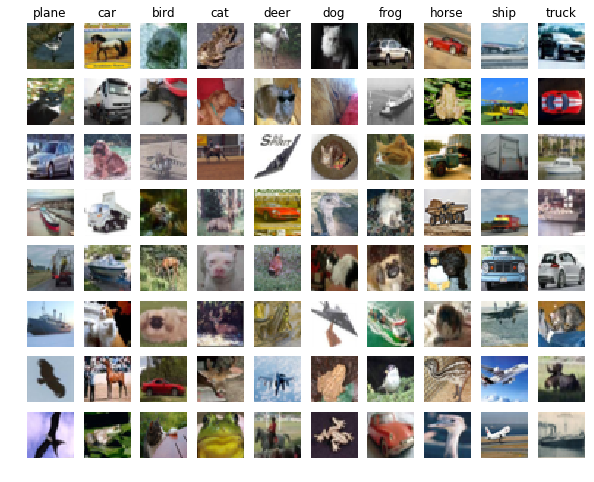

In [40]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

Many of them have something in common with its true label, like object contour, background, etc

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [41]:
print(X_train_feats.shape)

(49000, 155)


In [82]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# Train the network
stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=20000, batch_size=200,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.0000001, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val_feats) == y_val).mean()
print('Validation accuracy: ', val_acc)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 20000: loss 2.302585
iteration 0 : train 0.135000 val 0.144000
iteration 100 / 20000: loss 2.303054
iteration 200 / 20000: loss 2.150247
iteration 245 : train 0.240000 val 0.294000
iteration 300 / 20000: loss 1.799604
iteration 400 / 20000: loss 1.563378
iteration 490 : train 0.505000 val 0.446000
iteration 500 / 20000: loss 1.457475
iteration 600 / 20000: loss 1.513758
iteration 700 / 20000: loss 1.296858
iteration 735 : train 0.495000 val 0.492000
iteration 800 / 20000: loss 1.371473
iteration 900 / 20000: loss 1.329888
iteration 980 : train 0.535000 val 0.509000
iteration 1000 / 20000: loss 1.375178
iteration 1100 / 20000: loss 1.354278
iteration 1200 / 20000: loss 1.429125
iteration 1225 : train 0.565000 val 0.520000
iteration 1300 / 20000: loss 1.277871
iteration 1400 / 20000: loss 1.297852
iteration 1470 : train 0.530000 val 0.525000
iteration 1500 / 20000: loss 1.373605
iteration 1600 / 20000: loss 1.320702
iteration 1700 / 20000: loss 1.225668
iteration 1715 : tra

iteration 14455 : train 0.670000 val 0.616000
iteration 14500 / 20000: loss 0.814668
iteration 14600 / 20000: loss 0.936739
iteration 14700 / 20000: loss 0.899531
iteration 14700 : train 0.715000 val 0.614000
iteration 14800 / 20000: loss 0.847117
iteration 14900 / 20000: loss 0.940934
iteration 14945 : train 0.670000 val 0.615000
iteration 15000 / 20000: loss 0.787944
iteration 15100 / 20000: loss 0.908868
iteration 15190 : train 0.735000 val 0.611000
iteration 15200 / 20000: loss 1.034019
iteration 15300 / 20000: loss 0.836378
iteration 15400 / 20000: loss 0.820772
iteration 15435 : train 0.705000 val 0.615000
iteration 15500 / 20000: loss 0.839419
iteration 15600 / 20000: loss 0.887839
iteration 15680 : train 0.630000 val 0.618000
iteration 15700 / 20000: loss 0.934152
iteration 15800 / 20000: loss 0.834108
iteration 15900 / 20000: loss 0.994984
iteration 15925 : train 0.705000 val 0.617000
iteration 16000 / 20000: loss 0.884364
iteration 16100 / 20000: loss 0.861931
iteration 16170

In [83]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.597


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!